# Linear Regression

we will implement linear regression and observe its functionality on a dataset.

To start, we need to import the necessary libraries. We will use numpy for array and matrix operations, matplotlib for plotting, and pandas for data preprocessing.

# Step-1: Import Libraries

In [1]:

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

# Linear regression with single variable

In this scenario, we will perform linear regression with one variable to predict profits for a food truck. You are the CEO of a restaurant franchise and want to decide which city to open a new outlet in. The dataset for this problem is available in the file "Data/ex1data1.txt." It contains two columns: the population of a city (in 10,000s) and the profit of a food truck in that city (in $10,000s). A negative profit value indicates a loss.

We will load this dataset into variables x and y. The variable x will store the population data, and y will store the corresponding profit data.

# Step-2: Read Data`

In [2]:
# Read comma separated data
data = np.loadtxt(r'C:\Users\Admin\Desktop\ML Project\Linear Regression Single variable without libraries\ex1data1.txt', delimiter=',')
X, y = data[:, 0], data[:, 1]
m = y.size  # number of training examples
print(X.shape)


(97,)


Before proceeding with any task, it is often beneficial to gain an understanding of the data through visualization. In the case of this dataset, we can use a scatter plot to visualize the data since it contains only two properties to plot, namely, profit and population. Scatter plots are useful for displaying the relationship between two variables and identifying patterns or trends.

However, it's important to note that in real-life scenarios, many datasets are multi-dimensional and cannot be effectively plotted on a 2D graph. For such datasets with more than two features or properties, alternative visualization techniques like 3D plots, heatmaps, pair plots, or dimensionality reduction methods such as PCA (Principal Component Analysis) may be employed to understand the data and explore the relationships between the different variables. These visualization methods help in gaining insights into the data's structure, identifying correlations, and making informed decisions in more complex situations.

# step-3:Plotting the Data

In [3]:
print('Plotting Data ...\n')
def plotData(x, y):
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')
    fig = pyplot.figure()

Plotting Data ...



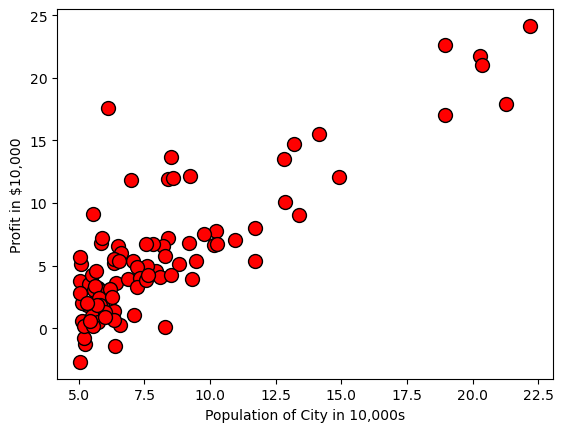

<Figure size 640x480 with 0 Axes>

In [4]:
plotData(X, y)

# Machine learning Concept

In this section, we will use gradient descent to estimate and fit the parameters 𝜃 for our linear regression model based on the dataset. Gradient descent is an optimization algorithm that iteratively updates the values of 𝜃 to minimize the cost function and find the best-fitted line for the given data. By adjusting 𝜃 using the gradient of the cost function, we aim to find the values that provide the best linear approximation to the data and yield the most accurate predictions.

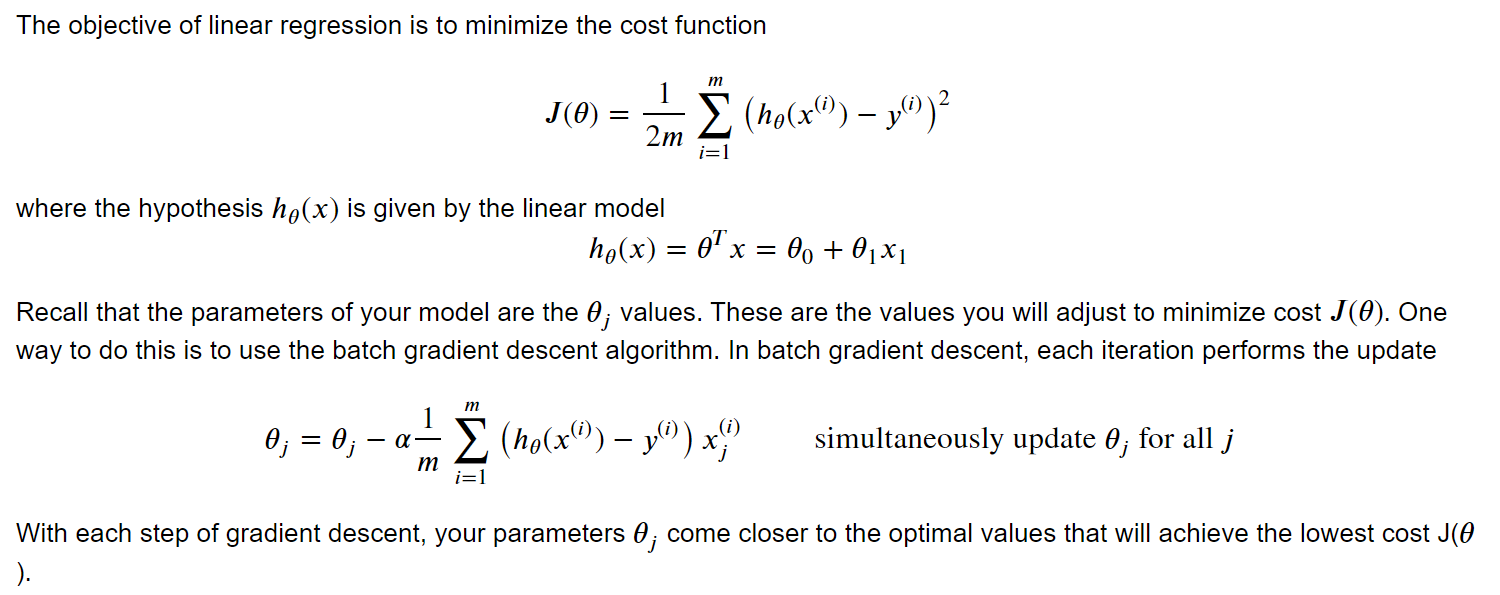

In [7]:
from IPython.display import Image

# Replace 'image_path' with the path to your image file
Image(filename=r'C:\Users\Admin\Desktop\attachments\machine learning concept.png')


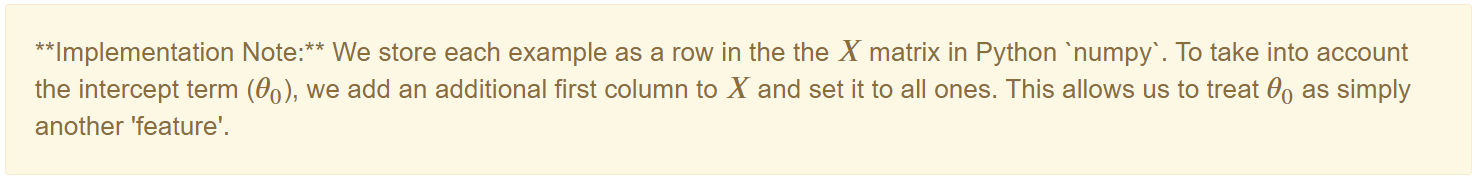

In [13]:
from IPython.display import Image

# Replace 'image_path' with the path to your image file
Image(filename=r'C:\Users\Admin\Desktop\attachments\download.png')


In [14]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(m), X], axis=1)
print(X.shape)

(97, 2)


In [15]:
theta=np.array([0.0, 0.0])
print(theta.shape)

(2,)


In order to monitor the convergence of gradient descent while minimizing the cost function 𝐽(𝜃), it's helpful to compute the cost at each iteration. To achieve this, your next task is to complete the implementation of the function compute_cost, which calculates 𝐽(𝜃).

When implementing the compute_cost function, keep in mind that the variables 𝑋 and 𝑦 are not scalar values. Instead, 𝑋 is a matrix whose rows represent the training examples, and 𝑦 is a vector whose elements represent the corresponding target values for each row of 𝑋.

The compute_cost function should take the following inputs:

The parameter vector 𝜃 (representing the coefficients of the linear regression model).
The feature matrix 𝑋 (where each row is a training example, and each column represents a feature).
The target vector 𝑦 (containing the target values for each training example).
The objective of the compute_cost function is to calculate the cost of the linear regression model given the current values of 𝜃. This cost is computed using the mean squared error (MSE) between the predicted values and the actual target values.

After implementing the compute_cost function, you can use it to monitor the convergence of gradient descent by tracking the cost at each iteration. The goal is to ensure that the cost decreases with each iteration as the algorithm progresses towards the optimal 𝜃, indicating successful convergence.

In [16]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already 
        appended to the features so we have n+1 columns.
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    
    theta : array_like
        The parameters for the regression function. This is a vector of 
        shape (n+1, ).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    """
    m = y.size  # number of training example
    J = 0
    H = np.dot(X,theta)# Ensure this is a valid multiplication
    J = (1/(2 * m)) * (sum(((H - y)** 2)))
    return J

In [17]:
# further testing of the cost function
J = computeCost(X, y, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


# Step-5: Gradient Descent

Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. 

The starter code for the function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a `python` list. Assuming you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [18]:
def gradientDescent(X, y, theta, alpha, num_iters):

    """ Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : array_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration """
    
    #Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    for i in range(num_iters):
        H = np.dot(X,theta)
        diff = np.dot(np.transpose(X), (H - y))
        theta = theta - (alpha * (1/m) * diff)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

After you are finished call the implemented `gradientDescent` function and print the computed $\theta$. We initialize the $\theta$ parameters to 0 and the learning rate $\alpha$ to 0.01. Execute the following cell to check your code.

In [19]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


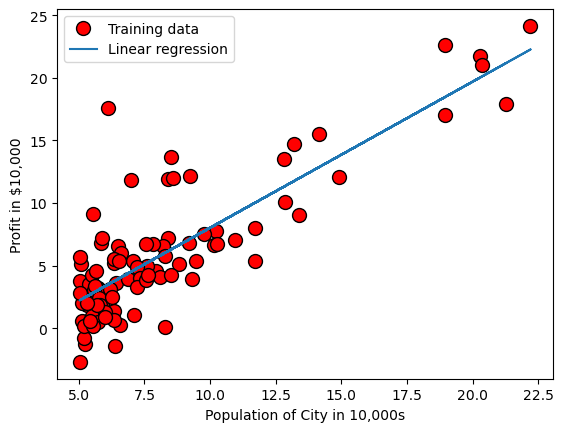

<Figure size 640x480 with 0 Axes>

In [20]:
# plot the linear fit
pyplot.plot(X[:, 1], y, 'ro', ms=10, mec='k')
pyplot.ylabel('Profit in $10,000')
pyplot.xlabel('Population of City in 10,000s')
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Training data', 'Linear regression']);
fig = pyplot.figure()

# Step-6: Prediction

In [22]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 4519.77

For population = 70,000, we predict a profit of 45342.45



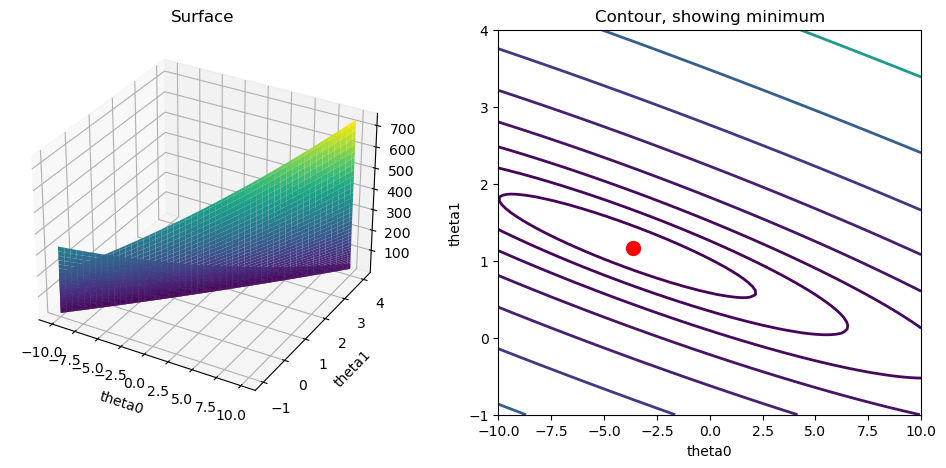

In [23]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contour, showing minimum')
pass